# Análisis de Demanda Comercial No Regulada por CIIU - Industria Alimentaria

Este notebook tiene como objetivo analizar el comportamiento del consumo de energía eléctrica no regulada para los códigos CIIU relacionados con la industria alimentaria. Este análisis se enfocará en extraer, procesar y visualizar la métrica “Demanda Comercial No Regulada por CIIU” disponible a través de la API de XM, empresa administradora del mercado eléctrico colombiano.

A través de este proyecto, se busca:

1. Conectarse a la API XM y extraer los datos relacionados con los códigos CIIU correspondientes a la elaboración de productos alimenticios.
2. Filtrar y procesar los datos para obtener una frecuencia diaria, adecuada para su análisis.
3. Generar visualizaciones claras y efectivas de las series de tiempo y otras representaciones para comprender tendencias y comportamientos en el consumo energético.

Librerías utilizadas:

* pandas: Para la manipulación y análisis de datos.
* datetime: Para manejar y transformar datos temporales.
* matplotlib y seaborn: Para crear gráficos informativos y estilizados.
* pydataxm: Para interactuar y consultar datos directamente desde la API XM.

## Configuración Inicial y Dependencias

En la siguiente celda, instalaremos la librería pydataxm, diseñada para interactuar de manera sencilla con la API de XM. Esta API proporciona datos relevantes del mercado eléctrico colombiano, como información sobre generación, demanda y precios de la energía.


In [92]:
# Instalar dependencias necesarias
!pip install pydataxm
!pip install openpyxl
!pip install matplotlib seaborn pandas


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importacion de librerías


In [93]:
import pandas as pd
import datetime as dt  
import matplotlib.pyplot as plt
import seaborn as sns
from pydataxm import * 

##  Consulta de Datos

En esta etapa, se inicializa el cliente de la API utilizando la librería pydataxm, lo que permite establecer la conexión para interactuar con los datos proporcionados por XM. Posteriormente, se realiza una consulta para obtener la colección "Demanda Comercial No Regulada por CIIU" (DemaComeNoReg), y los resultados se almacenan en un DataFrame para facilitar su análisis.


In [94]:
# Conexión al cliente API
dataxm_api = pydataxm.ReadDB() 

# Obtener la colección Demanda Comercial No Regulada por CIIU ("DemaComeNoReg") 
df = dataxm_api.get_collections('DemaComeNoReg')
df.head()

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
51,DemaComeNoReg,Demanda Comercial Mercado No Regulado por Agente,Agente,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Comercializador,kWh,Considera la demanda propia de cada comerciali...
53,DemaComeNoReg,Demanda Comercial Mercado No Regulado por Sistema,Sistema,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...
55,DemaComeNoReg,Demanda Comercial por CIIU,CIIU,31,HourlyEntities,http://servapibi.xm.com.co/hourly,No aplica,kWh,Considera la demanda propia de cada comerciali...


### Consulta de Datos con Rango de Fechas 

_Se obtiene la fecha actual y se calcula automáticamente el inicio del año. Luego, se realiza una consulta a la API utilizando un rango dinámico de fechas, desde el 1 de enero hasta la fecha actual, para obtener los datos de la colección 'Demanda Comercial No Regulada por CIIU'._

In [95]:
# Obtener la fecha actual
today = dt.date.today()

# Establecer la fecha inicial como el 1 de enero del presente año
start_date = dt.date(today.year, 1, 1)

# Llamar a la API con el rango de fechas dinámico
df_DemaComeNoReg = dataxm_api.request_data(
    'DemaComeNoReg',
    'CIIU',
    start_date,
    today)
df_DemaComeNoReg.head()

,Id,Values_Activity,Values_Subactivity,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
0,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ARTES PLÁSTICAS Y VISUALES,9005,17.45,17.51,17.46,17.29,17.49,17.32,...,96.49,95.80,96.18,95.86,95.26,89.20,85.99,73.40,57.05,2024-01-01
1,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ACTIVIDADES TEATRALES,9006,16.99,16.51,18.46,17.50,19.46,19.00,...,149.11,158.41,153.13,144.95,147.85,146.06,141.33,142.44,139.29,2024-01-01
2,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ACTIVIDADES DE ESPECTÁCULOS MUSICALES EN VIVO,9007,318.60,304.26,126.30,148.94,251.55,72.51,...,345.12,339.93,348.82,378.32,374.40,367.69,355.72,274.61,90.96,2024-01-01
3,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",OTRAS ACTIVIDADES DE ESPECTÁCULOS EN VIVO,9008,42.05,41.99,41.50,41.27,41.38,41.66,...,86.58,97.26,107.56,111.69,109.57,103.42,93.94,83.78,70.29,2024-01-01
4,CIIU,"ACTIVIDADES ARTÍSTICAS, DE ENTRETENEMIENTO Y R...",ACTIVIDADES DE BIBLIOTECAS Y ARCHIVOS,9101,68.09,68.94,67.71,68.14,63.31,66.76,...,74.90,75.76,78.15,76.21,75.59,74.08,119.05,131.47,133.04,2024-01-01


### Selección de Datos para la Industria Alimentaria

_En este bloque de código, se filtran los datos de la colección `DemaComeNoReg` para incluir únicamente las actividades de "INDUSTRIAS MANUFACTURERAS" con códigos CIIU relacionados con la elaboración de productos alimenticios._

_Para obtener más información sobre cada código CIIU, se puede consultar el archivo `diccionario_industria_alimentaria.md`, que contiene la descripción completa de cada uno._



In [96]:
# Convertir la columna 'Values_code' a formato de texto para asegurar la compatibilidad en las operaciones
df_DemaComeNoReg['Values_code'] = df_DemaComeNoReg['Values_code'].astype(str)

# Definir una lista de códigos CIIU que corresponden a la elaboración de productos alimenticios
ciiu_codes = [
    '1011', '1012', '1020', '1030', '1040', '1051', '1052', '1061', '1062', '1063', '1071', 
    '1072', '1081', '1082', '1083', '1084', '1089', '1090', '1101', '1102', '1103', '1104'
]

# Filtrar los datos para incluir solo las filas que pertenecen a la categoría 'INDUSTRIAS MANUFACTURERAS'
# y que tienen códigos CIIU correspondientes a la elaboración de productos alimenticios
df_manufactura_alimentos = df_DemaComeNoReg[
    (df_DemaComeNoReg['Values_Activity'] == "INDUSTRIAS MANUFACTURERAS") & 
    (df_DemaComeNoReg['Values_code'].isin(ciiu_codes))
]

df_manufactura_alimentos.head()

,Id,Values_Activity,Values_Subactivity,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Date
191,CIIU,INDUSTRIAS MANUFACTURERAS,PROCESAMIENTO Y CONSERVACIÓN DE CARNE Y PRODUC...,1011,16632.15,16363.25,16717.84,16701.90,16494.69,16189.56,...,17798.20,18176.18,18254.01,18017.11,18766.87,18725.42,18949.25,19637.77,19670.34,2024-01-01
192,CIIU,INDUSTRIAS MANUFACTURERAS,"PROCESAMIENTO Y CONSERVACIÓN DE PESCADOS, CRUS...",1012,1777.87,1778.46,1771.76,1769.07,1723.03,1774.64,...,1921.07,1914.71,1891.12,1898.94,1890.30,1884.73,1888.05,1883.68,1863.53,2024-01-01
193,CIIU,INDUSTRIAS MANUFACTURERAS,"PROCESAMIENTO Y CONSERVACIÓN DE FRUTAS, LEGUMB...",1020,2500.77,2463.29,2469.69,2389.81,2796.56,2853.50,...,2811.91,2878.83,2887.40,3026.64,3088.11,3135.11,3168.48,3264.91,3229.84,2024-01-01
194,CIIU,INDUSTRIAS MANUFACTURERAS,ELABORACIÓN DE ACEITES Y GRASAS DE ORIGEN VEGE...,1030,4229.88,4232.89,4087.32,4016.00,3966.30,3900.64,...,3708.99,3654.69,3776.77,4251.23,4491.17,4521.89,4652.66,5015.59,5223.90,2024-01-01
195,CIIU,INDUSTRIAS MANUFACTURERAS,ELABORACIÓN DE PRODUCTOS LÁCTEOS,1040,11916.05,11839.01,11660.28,11635.99,11692.39,11717.94,...,17077.99,17844.97,18108.43,18633.04,19363.36,19824.78,20231.70,22278.89,23814.29,2024-01-01


## Preparación de datos

### Crear y seleccionar columnas de horas.

In [97]:
# Convertir las columnas de horas en un formato que podamos usar (especificar nombres de columnas)
hour_columns = [f"Values_Hour{i:02}" for i in range(1, 25)]

# Seleccionar las columnas relevantes
df_selected = df_manufactura_alimentos[['Date', 'Values_code'] + hour_columns]


 ### Agrupar datos por fecha y código CIIU.

In [98]:
# Agrupar por fecha y código CIIU, sumando las horas
df_daily = df_selected.groupby(['Date', 'Values_code']).sum()

### Resetear índice y convertir fechas.

In [99]:
# Resetear el índice para hacer más accesible la información
df_daily_reset = df_daily.reset_index()
df_daily_reset['Date'] = pd.to_datetime(df_daily_reset['Date']).dt.date

### Agregar columna de demanda diaria total.

In [100]:
# Agregar la columna 'Total_Demanda_Dia' sumando todas las columnas de Values_Hour
df_daily_reset['Total_Demanda_Dia'] = df_daily_reset[hour_columns].sum(axis=1)

### Guardar resultados en archivo Excel.

In [101]:
# Guardar el DataFrame a un archivo CSV o Excel
#df_daily_reset.to_csv('frecuencia_diaria_manufactura_alimentos_con_total.csv', index=False)
df_daily_reset.to_excel('frecuencia_diaria_manufactura_alimentos_con_total.xlsx', index=False)

# Verificación
print("Archivo exportado correctamente.")
df_daily_reset.head()

Archivo exportado correctamente.


,Date,Values_code,Values_Hour01,Values_Hour02,Values_Hour03,Values_Hour04,Values_Hour05,Values_Hour06,Values_Hour07,Values_Hour08,...,Values_Hour16,Values_Hour17,Values_Hour18,Values_Hour19,Values_Hour20,Values_Hour21,Values_Hour22,Values_Hour23,Values_Hour24,Total_Demanda_Dia
0,2024-01-01,1011,16632.15,16363.25,16717.84,16701.90,16494.69,16189.56,16086.31,15404.21,...,17798.20,18176.18,18254.01,18017.11,18766.87,18725.42,18949.25,19637.77,19670.34,414876.28
1,2024-01-01,1012,1777.87,1778.46,1771.76,1769.07,1723.03,1774.64,1770.48,1782.61,...,1921.07,1914.71,1891.12,1898.94,1890.30,1884.73,1888.05,1883.68,1863.53,44340.97
2,2024-01-01,1020,2500.77,2463.29,2469.69,2389.81,2796.56,2853.50,2832.59,2831.87,...,2811.91,2878.83,2887.40,3026.64,3088.11,3135.11,3168.48,3264.91,3229.84,68052.00
3,2024-01-01,1030,4229.88,4232.89,4087.32,4016.00,3966.30,3900.64,3513.02,4135.53,...,3708.99,3654.69,3776.77,4251.23,4491.17,4521.89,4652.66,5015.59,5223.90,99322.78
4,2024-01-01,1040,11916.05,11839.01,11660.28,11635.99,11692.39,11717.94,10928.07,11326.83,...,17077.99,17844.97,18108.43,18633.04,19363.36,19824.78,20231.70,22278.89,23814.29,371849.40


# Visualizaciones

## 1 Comportamiento de la demanda de energía por hora  en el sector industria manufacturera relacionada con elaboración de productos alimenticios

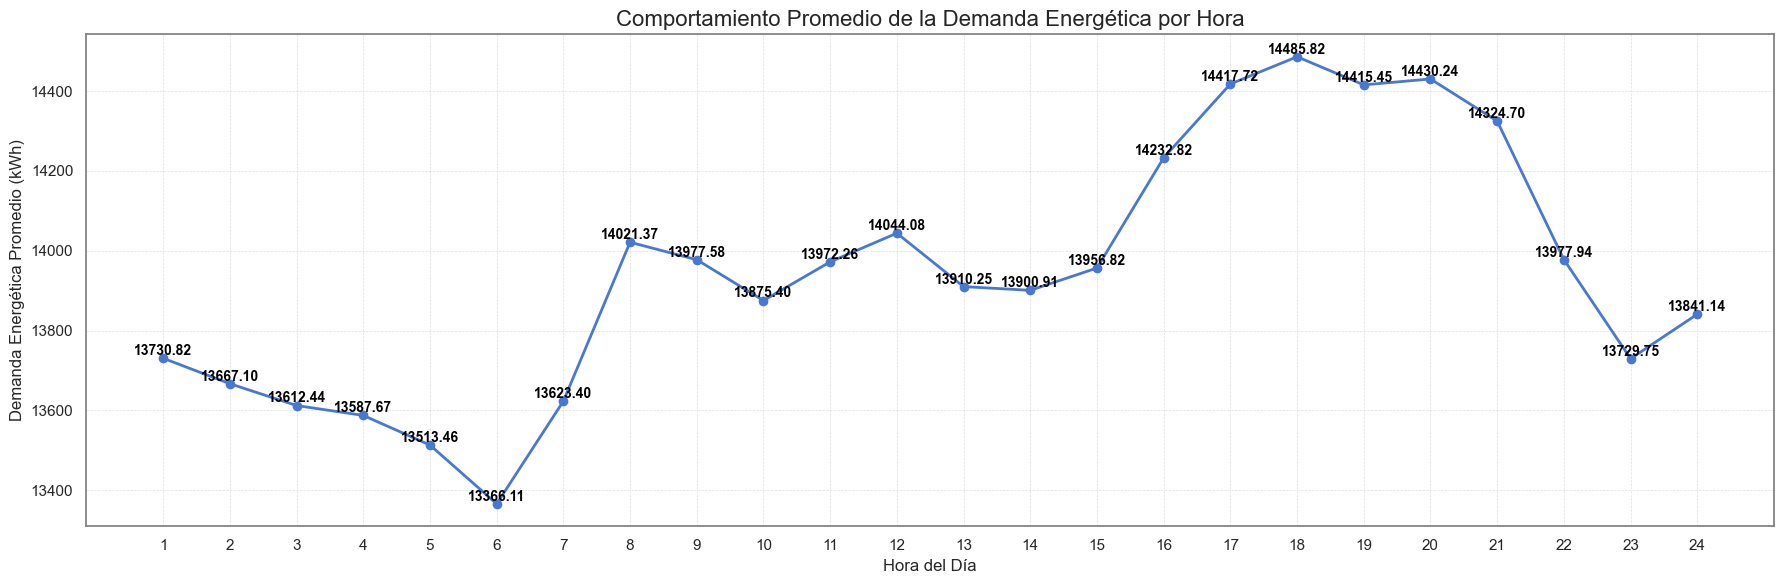

In [102]:
# Definir las columnas correspondientes a las horas del día (Values_Hour01, Values_Hour02, ..., Values_Hour24)
hour_columns = [f'Values_Hour{i:02}' for i in range(1, 25)]

# Calcular la demanda promedio por hora del día utilizando las columnas correspondientes
avg_hourly_demand = df_daily_reset[hour_columns].mean()

# Configurar y personalizar el gráfico
plt.figure(figsize=(18, 6))  
plt.plot(range(1, 25), avg_hourly_demand, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)
plt.title('Comportamiento Promedio de la Demanda Energética por Hora', fontsize=16)
plt.xlabel('Hora del Día', fontsize=12)
plt.ylabel('Demanda Energética Promedio (kWh)', fontsize=12)

# Configurar las marcas en el eje X para que representen cada hora del día
plt.xticks(range(1, 25))
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

# Agregar los valores sobre los puntos de la curva con un pequeño ajuste vertical para más espacio
for i, demand in enumerate(avg_hourly_demand, 1):  # Iterar sobre las horas y sus demandas
    plt.text(i, demand + 0.1, f'{demand:.2f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')
plt.tight_layout()
plt.show()


### Observaciones del Comportamiento de la Demanda Energética
(Industria Manufacturera de Productos Alimenticios):

* Pico de Demanda en la Tarde:
La demanda alcanza su máximo a las Hora 18, con 14,485.82 kWh, lo que indica el periodo de mayor actividad en la planta. Este pico podría estar relacionado con los procesos de mayor consumo energético, como el procesamiento y embalaje de productos, que tienden a intensificarse en la tarde.

* Demanda Baja al Iniciar el Día:
A las Hora 6, la demanda es la más baja, 13,366.11 kWh, lo que refleja la fase de arranque de la producción. Es posible que durante estas horas se realicen tareas de mantenimiento, preparación de equipos o puesta en marcha de líneas de producción.

* Incremento de Demanda Entre la Hora 6 y Hora 8:
Durante las Hora 6 a Hora 8, se observa un aumento notable en la demanda, alcanzando los 14,021.37 kWh. Esto sugiere que, a medida que avanza el día, la planta aumenta su producción y consumo energético, posiblemente debido a la activación de más maquinaria y el comienzo de la producción a gran escala.

* Estabilidad en la Noche:
A partir de la Hora 19, la demanda se estabiliza alrededor de los 14,300 kWh. Aunque la actividad productiva disminuye, la planta sigue operando, posiblemente con turnos nocturnos o actividades que requieren una cantidad constante de energía, como el mantenimiento o el almacenamiento de productos terminados.

### Conclusión:
El comportamiento de la demanda energética en la industria alimentaria presenta un patrón típico de menor demanda en las primeras horas del día, seguido de un incremento progresivo hasta el pico en la Hora 18, donde la producción alcanza su punto máximo. Después, la demanda se estabiliza por la noche, lo que refleja una leve desaceleración en las operaciones al final del turno. Este comportamiento sugiere que la planta optimiza sus recursos a lo largo del día, con picos de consumo bien definidos que podrían beneficiarse de una mejor planificación energética para reducir costos y mejorar la eficiencia operativa.

## 2 Análisis de la Distribución Porcentual de la Demanda Energética Total por Código CIIU en lo que va del Año

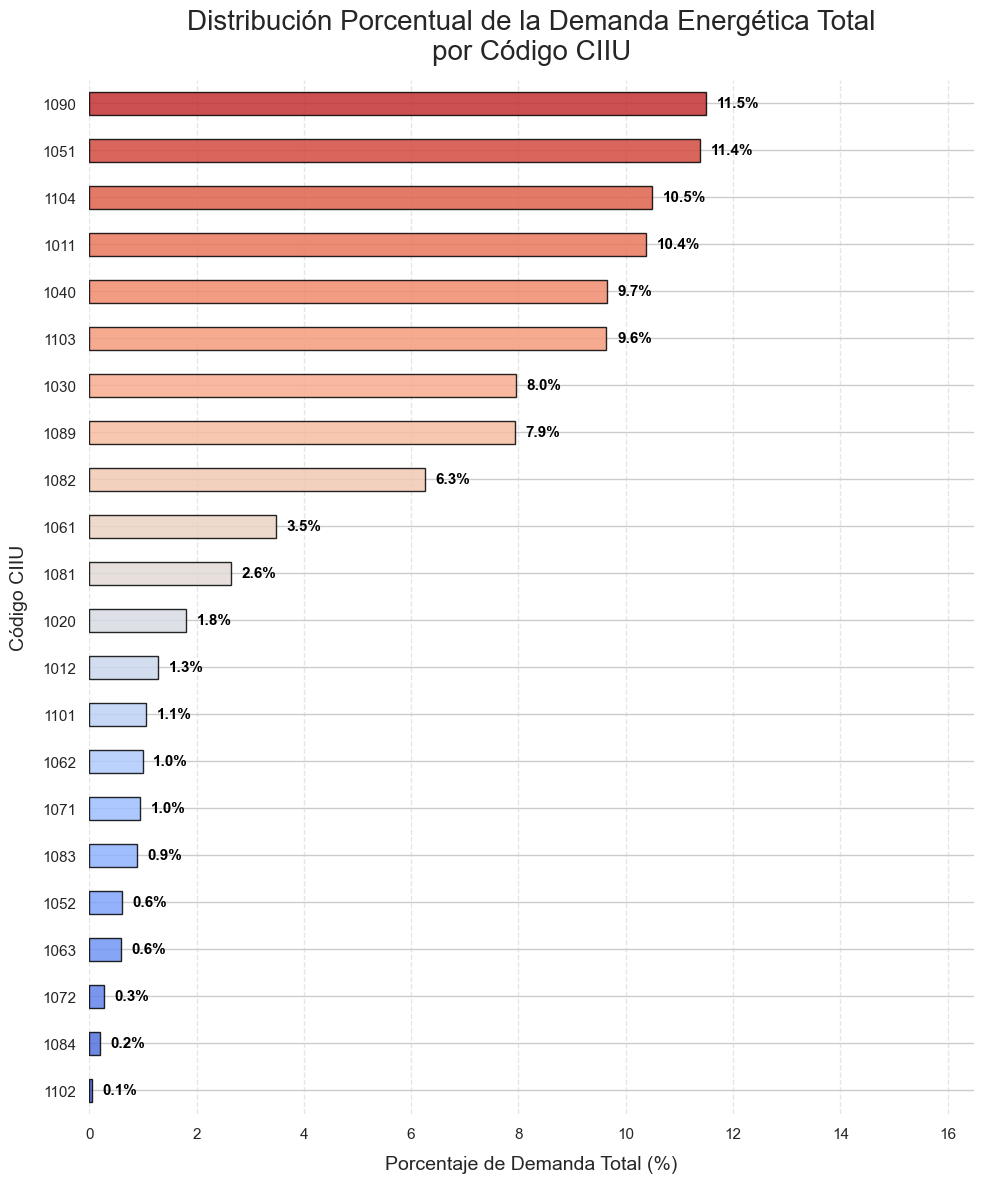

In [110]:
# Calcular la demanda total por código CIIU
df_total_by_ciiu = df_daily_reset.groupby('Values_code')['Total_Demanda_Dia'].sum()

# Calcular el porcentaje
total_demanda = df_total_by_ciiu.sum()
df_percent_by_ciiu = (df_total_by_ciiu / total_demanda) * 100

# Ordenar los datos
df_percent_sorted = df_percent_by_ciiu.sort_values()
sns.set(style="whitegrid")
colors = sns.color_palette("coolwarm", len(df_percent_sorted))

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 12))
ax = df_percent_sorted.plot(kind='barh', color=colors, edgecolor='black', alpha=0.85)
for i, v in enumerate(df_percent_sorted):
    ax.text(v + 0.2, i, f'{v:.1f}%', va='center', fontsize=11, color='black', fontweight='bold')

# Configurar grafico
plt.title('Distribución Porcentual de la Demanda Energética Total\npor Código CIIU', 
          fontsize=20, pad=15)
plt.xlabel('Porcentaje de Demanda Total (%)', fontsize=14, labelpad=10)
plt.ylabel('Código CIIU', fontsize=14, labelpad=10)
plt.xlim(0, df_percent_sorted.max() + 5)
plt.subplots_adjust(left=0.3)
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


